This notebook is part the of Dr. Christoforos Christoforou's course materials. You may not, nor may you knowingly allow others to reproduce or distribute lecture notes, course materials or any of their derivatives without the instructor's express written consent.

In [ ]:
# Setting up the environment
import tensorflow.keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Exercise 1: Load and preprocess the dataset.

**Task 1: Load the MNIST dataset**: In the cell below, load the MNIST dataset, and standardize the dataset by applying the following pre-processing steps:

- Reshape the data array to `channels_last` (i.e. `(obs,row,cols,color)`).
- Convert the data array to `float32`.
- Normalize data array (i.e. divide by 255)
- Convert labels to categorical variables (i.e. one-hot encoding) using the `tensorflow.keras.utils.to_categorical(y_train)`.

At the completion of this step you should have the following variables:
Shape X_train : (60000, 28, 28, 1)
Shape y_train : (60000, 10)
Shape X_test : (10000, 28, 28, 1)
Shape y_test : (10000, 10)

* `X_train`,`X_test`: 4D array of shape (60000, 28, 28, 1) and (10000, 28, 28, 1) respectively, that stores the standardized MNIST data.
* `y_train` and `y_test`: 2D array of shape (60000, 10) and (10000, 10) which uses one-hot-encoding for the labels in the MNIST dataset.




In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')


X_train /= 255
X_test /= 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


print("Shape X_train :", X_train.shape)
print("Shape y_train :", y_train.shape)
print("Shape X_test :", X_test.shape)
print("Shape y_test :", y_test.shape)

Shape X_train : (60000, 28, 28, 1)
Shape y_train : (60000, 10)
Shape X_test : (10000, 28, 28, 1)
Shape y_test : (10000, 10)


## Exercise 2:Building a Convolutional Neural Network using high-level Keras API

In this introductory example, we will build a convolutional neural network using high-level Keras API. For that, you will need several objects provided by the API; which include the `Sequential` model which is defined under the module `tensorflow.keras.models`, and four computational layers that are defined under the `tensorflow.keras.layers module`. These layers include

* the `Conv2D` layer which implement the convolutional layer;
* the `MaxPool2D` layer which implements the max pooling operation;
* the `Flatten` layer and the `Dense` layer

These libraries have been imported at the beginning of the notebook, but to make this section self-contained, we re-import them in the cell below.


In [ ]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
import time

**Defining a CNN Architecture**

We can define the convolutional neural network architecture using the keras API. First, we define a general `Sequential` model and then `add` to it the various computational layer.

**Convolutional layer:** The first layer of the model will be a convolutional layer defined by the `Conv2D` layer in keras. The `Conv2D` layer takes several parameters, but in this example, we will focus on the two required parameters; these are the `filters` and the `kernel_size`. The `filters` argument is an integer that specifies the number of filters (i.e. kernels) to use used during the cross-correlation (we can think of this parameter as the size of the filter bank we want to use). The `kernel_size` parameters, is a tuple that specifies the kernel size to use. For example, the code `Conv2D(filters=32, kernel_size=(3,3))` specifies a convolutional layer that uses 32 filters/kernels, and each kernel is of size 3x3. Typically, when we define a convolutional layer on the input data, we must specify the `input_shape` parameter, which is a tuple which stores the dimension of the input tensor. For example, if our input image is of shape `(28,28,1)`, as it is the case for the MNIST dataset, we can specify that when we define the first `Conv2D` layer in our network, using the syntax `Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1))`. The input shape parameter is authomatically set of subsequent layers in our network.

**MaxPooling layer:**After adding a convolutional layer, we can typically apply a `MaxPool` layer, to reduce the spatial resolution of the output tensor. The `MaxPool` layer takes as input the `pool_size=(2,2)`.

After we specify the convolutional and max-pooling layer in our architecture, we can then append the necessary dense layer to perform prediction task. The following code illustrates how to define a simple CNN architecture using the above layers.

```python
model= Sequential()

input_shape = X_train[0].shape

# 32: number of filters, (3,3): kernel_size, input_shape (28,28,1)
# Output:  #epoch x 26 x 26 x filters ; convolutions reduces image size by kernal-size-1
# #params 3*3*32= 280 + 32 biases.
model.add(Conv2D(32,(3,3),activation='relu',input_shape=input_shape))

# MaxPool2D Layer ->
# Output : epoch x 13 x 13 x #fitlers
model.add(MaxPool2D(pool_size=(2,2)))

# Dropout Layer Output epoch x 13 x 13 x #fitlers
model.add(Dropout(0.5))

# parameters : 3*3*32*64=18432 for W, plus 64 biases =  18496
model.add(Conv2D(64,(3,3),activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))


# Flatten tensor epoch x 5408; (13*13*32-filters)
model.add(Flatten())

# Dense Layer Output : epoch x 32
model.add(Dense(32,activation='relu'))

# Dropout layer epoch x 32
model.add(Dropout(0.5))

# Dense layer : expoch x 10
model.add(Dense(10,activation='softmax'))


```


**Task 2.1** In the cell below, define the neural network architecture specified in the section above.

In [ ]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout

model = Sequential()
input_shape = (28, 28, 1)

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

**Compile the Neural Network Architecture**
Once we define the model, we need to compile it using the `model.compile` method of the API. We can train the compiled model  by calling the `model.fit` method of the API. Once we have a trained model, we can evaluate its performance on a test set by using `model.evaluate` method and apply the model to make prediction on new unseen data using the `model.predict` method.

**Task 2.2:** Compile the Neural Network Architecture you defined in task 2.1

**Task 2.3** Train the model by calling the `model.fit` method

**Task 2.4:** Evaluate the model you trained in task 2.3 and report its accuracy and loss.

**Task 2.5** Apply the model you trained in task 2.4 on the test set and report its performance. Moreover, identify the first three instances the model misclassifies and display their image; indicating in the title the predicted value.

Use the cells below to complete these tasks


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 54s 35ms/step - loss: 0.7865 - accuracy: 0.7312 - val_loss: 0.1317 - val_accuracy: 0.9660
Epoch 2/10
1500/1500 [==============================] - 51s 34ms/step - loss: 0.3883 - accuracy: 0.8718 - val_loss: 0.0826 - val_accuracy: 0.9761
Epoch 3/10
1500/1500 [==============================] - 52s 35ms/step - loss: 0.3216 - accuracy: 0.8953 - val_loss: 0.0682 - val_accuracy: 0.9815
Epoch 4/10
1500/1500 [==============================] - 51s 34ms/step - loss: 0.2913 - accuracy: 0.9046 - val_loss: 0.0608 - val_accuracy: 0.9821
Epoch 5/10
1500/1500 [==============================] - 51s 34ms/step - loss: 0.2776 - accuracy: 0.9090 - val_loss: 0.0560 - val_accuracy: 0.9846
Epoch 6/10
1500/1500 [==============================] - 58s 38ms/step - loss: 0.2589 - accuracy: 0.9164 - val_loss: 0.0552 - val_accuracy: 0.9840
Epoch 7/10
1500/1500 [==============================] - 50s 33ms/step - loss: 0.2399 - accuracy: 0.9226 - val_loss: 0.0490 -

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}, Test Loss: {test_loss}")


313/313 [==============================] - 3s 9ms/step - loss: 0.0423 - accuracy: 0.9871
Test Accuracy: 0.9871000051498413, Test Loss: 0.042278990149497986


313/313 [==============================] - 5s 14ms/step


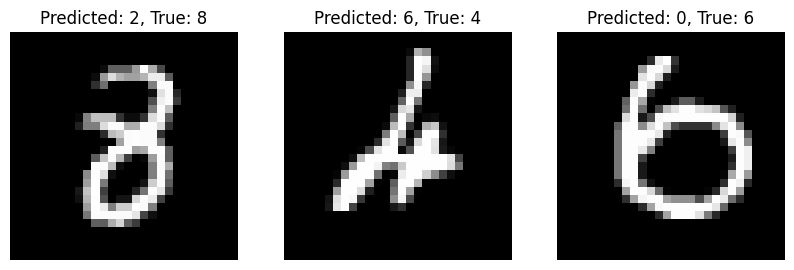

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


predictions = model.predict(X_test)


predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

misclassified_indices = np.where(predicted_classes != true_classes)[0]

plt.figure(figsize=(10, 3))
for i, index in enumerate(misclassified_indices[:3]):
    plt.subplot(1, 3, i+1)
    plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_classes[index]}, True: {true_classes[index]}")
    plt.axis('off')
plt.show()


## Exercise 3 Loading your own dataset.

The code below illustrates how to download a remote dataset, and unzip it. As an example, we use the Cats and Dogs dataset provided by Microsoft and is available at this url https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765  (direct link: https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip)

You can download the dataset using the `wget` command; and unzip it using the `uzip` command. The code below illustrates how to do this



In [30]:
!wget -O /content/sample_data/CatsAndDogs.zip https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

--2024-03-21 09:12:46--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.222.202.7, 2600:1408:c400:1580::317f, 2600:1408:c400:158f::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.222.202.7|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-03-21 09:12:47 ERROR 404: Not Found.



In [33]:
!unzip /content/sample_data/CatsAndDogs.zip

Archive:  /content/sample_data/CatsAndDogs.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/sample_data/CatsAndDogs.zip or
        /content/sample_data/CatsAndDogs.zip.zip, and cannot find /content/sample_data/CatsAndDogs.zip.ZIP, period.


To preprocess the dataset, we need the following libraries.

In [ ]:
from skimage import io
import os
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

A basic pre-processing step we need to apply in new image datasets is to resize them and normalize them. As part of this example, we will pre-process the image by cropping each image to a square; resize it to a requested size; and normalize each image. The function `standarize_image` below does exactly that. You will use this function to pre-process the dataset.

In [ ]:

def standarize_image(img_array,resize_pixels=256):

  img = Image.fromarray(img_array)

 
  cols, rows = img.size
  extra = (rows-cols)/2

  if (extra>0):

    crop_box = (0,extra,cols,cols+extra)
  else:

    crop_box = (-extra,0,rows-extra,rows)


  standarized_image = img.crop(crop_box).resize((resize_pixels,resize_pixels), Image.ANTIALIAS)


  standarized_image_vector = (np.asarray(standarized_image).flatten().astype(np.float32)-128)/128

  standarized_image_tensor = (np.asarray(standarized_image).astype(np.float32)-128)/128

  return standarized_image_tensor, standarized_image_vector, standarized_image


**Load and pre-process the dataset**
The code below illustrates how to load the dataset.
```python
# Go over the entire dataset and convert it into a single files.
x_all = []
y_all = []

Categories = ["Cat","Dog"]
sample_size = 100

for category in Categories:     # do dogs and cats
    class_num = Categories.index(category)
    path = os.path.join(data_root_folder,category)  # create path to dogs and cats
   
    image_list = os.listdir(path)
    image_list = image_list[0:sample_size]
    for img in image_list:  # iterate over each image per dogs and cats
      img_array = io.imread(image)  
      (img_tensor,_,img) = standarize_image(img_array,32)
    
      x_all.append(img_tensor)
      y_all.append(class_num)

# Convert the list to a 4D array
x_all = np.array(x_all)
y_all = np.array(y_all)
```
**Task 3.1** Reproduce the code above, but change it so that it returns a sample of 4000 images (2000 for each class) of size 64 by 64 pixels each.  

In [39]:
import os
from PIL import Image
from skimage import io
import numpy as np


def standarize_image(img_array, resize_pixels=64):
    img = Image.fromarray(img_array)
    cols, rows = img.size
    extra = (rows - cols) / 2

    if extra > 0:
        crop_box = (0, extra, cols, cols + extra)
    else:
        crop_box = (-extra, 0, rows - extra, rows)

    standarized_image = img.crop(crop_box).resize((resize_pixels, resize_pixels), Image.Resampling.LANCZOS)
    standarized_image_tensor = (np.asarray(standarized_image).astype(np.float32) - 128) / 128

    return standarized_image_tensor


data_root_folder = '/content/sample_data/Cat_Dog'
Categories = ["Cat", "Dog"]
sample_size = 2000  # Adjusted sample size per category;

x_all = []
y_all = []

print("Current working directory:", os.getcwd())

for category in Categories:
    class_num = Categories.index(category)
    path = os.path.join(data_root_folder, category)

    image_list = os.listdir(path)[:sample_size]
    for img_name in image_list:
        try:
            img_path = os.path.join(path, img_name)
            img_array = io.imread(img_path)
            img_tensor = standarize_image(img_array, 64)


            if img_tensor.shape == (64, 64, 3):
                x_all.append(img_tensor)
                y_all.append(class_num)
            else:
                print(f"Skipped {img_name} due to unexpected shape: {img_tensor.shape}")
        except Exception as e:
            print(f"Error loading image {img_name}: {e}")


print(f"Final number of images: {len(x_all)}")
try:
    x_all = np.array(x_all)
    y_all = np.array(y_all)
except ValueError as e:
    print(f"Error during array conversion: {e}")





Current working directory: /content
Skipped 5686.jpg due to unexpected shape: (64, 64)
Error loading image 10404.jpg: attempt to seek outside sequence
Skipped 1789.jpg due to unexpected shape: (64, 64, 4)
Skipped 1773.jpg due to unexpected shape: (64, 64)
Final number of images: 3996


In the steps above, you create a standardized  dataset `x_all` that stores all observations in the dataset, and `y_all` that stores all the corresponding elements in the dataset. To train a model, we need to `slit` the dataset into a train and test set. We can do that using the `train_test_split` method of `sklearn` library as follows :

```python
(X_train, X_test, y_train, y_test) = train_test_split(x_all, y_all, test_size=0.25, random_state=42)
```
then to store the dataset for further processing, we can use the `save` method provided by numpy as follows:

```python
dataset = ((X_train, y_train), (X_test, y_test))

# saves data in a file CatDog_preprocessed.npy, under folder sample_data.
np.save('sample_data/CatsDog_preprocessed',dataset)
```

Subsequently, we can load the data in a format we can use in a network; using the following code:
```python
(X_train, y_train), (X_test, y_test) = np.load("sample_data/CatsDog_preprocessed.npy",allow_pickle=True)

```

**Task 3.2:** Use the sample code above to a) split the `x_all` and `y_all` dataset into a `train` and `test` set. Save the resulting slit into a tuple format (similar to the format the MNIST dataset is stored).

In [48]:


from sklearn.model_selection import train_test_split
import numpy as np


(X_train, X_test, y_train, y_test) = train_test_split(x_all, y_all, test_size=0.25, random_state=42)


dataset = ((X_train, y_train), (X_test, y_test))

np.save('/content/sample_data/X_train.npy', X_train)
np.save('/content/sample_data/X_test.npy', X_test)
np.save('/content/sample_data/y_train.npy', y_train)
np.save('/content/sample_data/y_test.npy', y_test)


X_train = np.load('/content/sample_data/X_train.npy', allow_pickle=True)
X_test = np.load('/content/sample_data/X_test.npy', allow_pickle=True)
y_train = np.load('/content/sample_data/y_train.npy', allow_pickle=True)
y_test = np.load('/content/sample_data/y_test.npy', allow_pickle=True)


dataset = ((X_train, y_train), (X_test, y_test))








# Exercise 4

Build a convolutional neural network (CNN) to classify images to either `cats` or `dogs` using the Microsoft dataset. Report the network performance and apply the network on the test set. Use as many cells as necessary.


In [ ]:
import numpy as np

(X_train, y_train), (X_test, y_test) = np.load('/content/sample_data/CatsDogs_preprocessed.npy', allow_pickle=True)

from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

predictions = model.predict(X_test)













Copyright Statement: Copyright © 2020 Christoforou. The materials provided by the instructor of this course, including this notebook, are for the use of the students enrolled in the course. Materials are presented in an educational context for personal use and study and should not be shared, distributed, disseminated or sold in print — or digitally — outside the course without permission. You may not, nor may you knowingly allow others to reproduce or distribute lecture notes, course materials as well as any of their derivatives without the instructor's express written consent.